### 开源库folium制图基础
1.底图设定   
2.添加标记Maker


In [2]:
import folium
import base64
import cv2


#### 底图显示，folium底图包括（网络原因，有时打不开）：'OpenStreetMap' (默认)，'Stamen Terrain'，'Stamen Watercolor'等。
云大坐标：（102.84，24.83）

In [3]:
map = folium.Map(location=[24.83, 102.84], tiles='OpenStreetMap', zoom_start=11)
map


##### 设置高德、百度、天地图等为底图
高德地图(中英文版): 'https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}'.
高德卫星地图：'https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}'
GeoQ智图中国行政边界图：'http://thematic.geoq.cn/arcgis/rest/services/ThematicMaps/administrative_division_boundaryandlabel/MapServer/tile/{z}/{y}/{x}',
GeoQ智图水系图：'http://thematic.geoq.cn/arcgis/rest/services/ThematicMaps/WorldHydroMap/MapServer/tile/{z}/{y}/{x}'


In [4]:
map = folium.Map(location=[24.83, 102.84], 
           tiles='https://webrd02.is.autonavi.com/appmaptile?lang=zh_en&size=1&scale=1&style=8&x={x}&y={y}&z={z}',
           attr='高德地图-中英文版')
map


In [5]:
map = folium.Map(location=[24.83, 102.84], 
           tiles='https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}',
           attr='高德卫星地图')
map


#### 添加位置标记Marker
云南大学位置：（24.827, 102.850）  
云南师范大学位置：（24.861, 102.854）  
春城公园：（24.877, 102.830）  
洛龙公园：（24.889, 102.819）  

In [6]:
map_1 = folium.Map(location=[24.83, 102.84], 
           tiles='https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}',
           attr='高德卫星地图',
           zoom_start=12)
folium.Marker(location=[24.827, 102.850], tooltip='大学', popup='云南大学').add_to(map_1)
folium.Marker(location=[24.861, 102.854], tooltip='大学', popup='云南师范大学').add_to(map_1)
folium.Marker(location=[24.877, 102.830], tooltip='公园', popup='春城公园', icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker(location=[24.889, 102.819], tooltip='公园', popup='洛龙公园', icon=folium.Icon(color='green')).add_to(map_1)
map_1


##### 自定义弹窗信息（图片文字等）


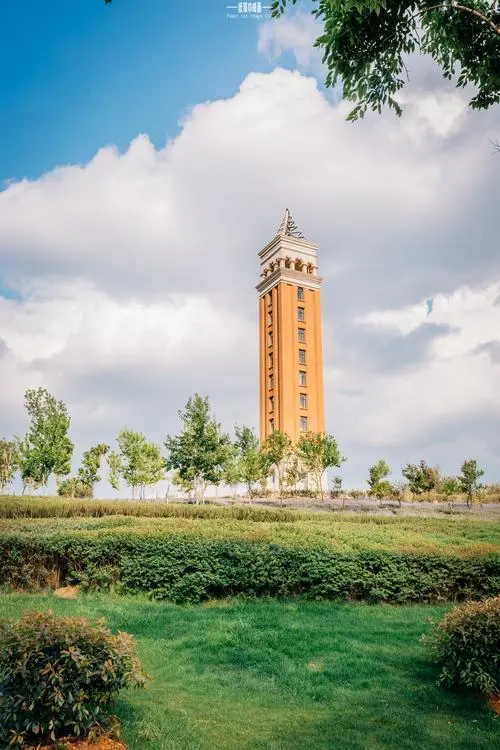

In [8]:
### 对标记添加图片
map_2 = folium.Map(location=[24.83, 102.84], 
           tiles='https://webst02.is.autonavi.com/appmaptile?style=6&x={x}&y={y}&z={z}',
           attr='高德卫星地图',
           zoom_start=12
           )
path_picture = 'data/Section-6/ynu.jpg'
height, width = cv2.imread(path_picture).shape[:2]
encoded = base64.b64encode(open(path_picture, 'rb').read())   ##  图像编码
html = '<img src="data:image; base64, {}">'.format(encoded.decode('UTF-8'))  ### 定义html格式弹窗信息
### 设置弹窗为图片+文字
# html = '''<p>这是云南大学的标志性建筑：鼓楼</p>
#           <br><img src="data:image; base64,{}"><br>''' \
#           .format(encoded.decode('UTF-8'))     ### 定义文字+图片的html格式
iframe = folium.IFrame(html=html, width=width, height=height)  ## 弹窗结构
popup_picture = folium.Popup(iframe)
height, width = cv2.imread(path_picture).shape[:2]
folium.Marker(location=[24.827, 102.850], popup=popup_picture, tooltip='云南大学').add_to(map_2)
# ## 设置图片为标签
# icon_picture = folium.features.CustomIcon(icon_image=path_picture, icon_size=(30,30))
# folium.Marker(location=[24.827, 102.850], tooltip='云南大学', popup=popup_picture, icon=icon_picture).add_to(map_2)
map_2


#### 添加图形（线：Polyline）

In [41]:
coords_polyline = [
    (24.827, 102.850),
    (24.889, 102.819),
]
folium.PolyLine(coords_polyline, tooltip="云南大学—春城公园", color='red').add_to(map_2)
map_2


#### 将在线地图保存为html文件


In [42]:
map_2.save("data/Section-6/index.html")
